# Install Libraries

In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver
#%pip install -q git+https://github.com/huggingface/transformers.git
%pip install datasets

# Import Dependencies

In [ ]:
from datasets import Dataset, load_dataset
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tqdm import tqdm
import torch
from PIL import Image
import io
import leafmap
from samgeo import tms_to_geotiff, split_raster
from samgeo.text_sam import LangSAM

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
sidewalk_test = load_dataset("back2classroom/sidewalks", split='val', streaming=True)

# Save Paths to Local Tiff Files from Val Split

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/gdrive_test"
sidewalk_images = []

if os.path.exists(dir):
    # Get a list of all files in the directory
    files = os.listdir(dir)

    # Create a list of full paths to each file
    for file in files:
        full_path = os.path.join(dir, file)
        sidewalk_images.append(full_path)
sidewalk_images.sort()

# Testing SAM VIT-H

We started with the default SAM model, which is also the largest model. As can be seen below, the model was largely incapable of detecting trees, likely due to the red-tinted coloration. Tweaking the box and text thresholds generally led to either no mask, or results largely similar to those below

In [ ]:
# default: vit-h
sam = LangSAM()

In [ ]:
text_prompt = "tree"

In [ ]:
import cv2
image = cv2.imread(sidewalk_images[0])
image.shape

(5000, 5000, 3)

In [ ]:
sam.predict_batch(
    images=sidewalk_images[:10],
    out_dir="sidewalk_masks",
    text_prompt=text_prompt,
    box_threshold=0.40,
    text_threshold=0.40,
    mask_multiplier=255,
    dtype="uint8",
    merge=False,
    verbose=True,
)

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_11_14.tif


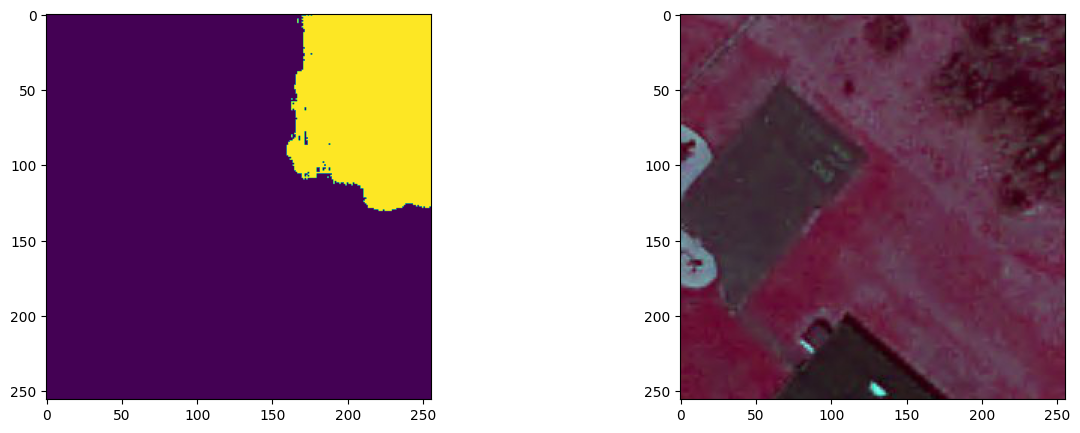

In [ ]:
tif_path = "/content/sidewalk_masks/1016_11_14_mask.tif"
ind = 14
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_14.tif


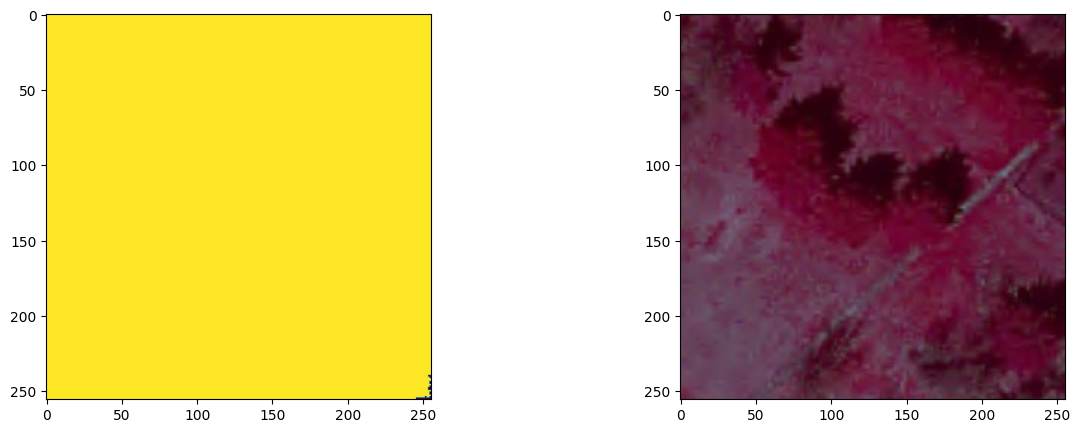

In [ ]:
tif_path = "/content/sidewalk_masks/1016_10_14_mask.tif"
ind = 4
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_3.tif


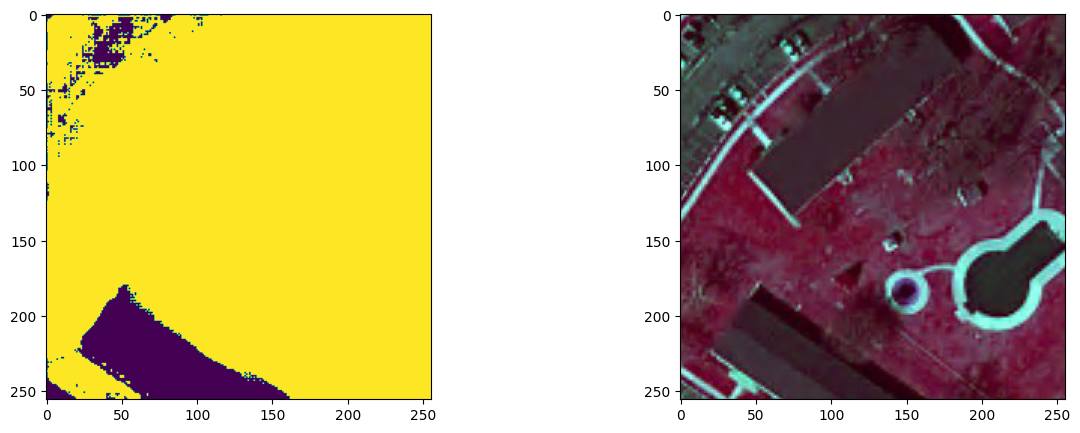

In [ ]:
# both prompt and bbox thresholds lowered to 30 for this mask
tif_path = "/content/sidewalk_masks/1016_10_3_mask.tif"
ind = 7
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_13_20.tif


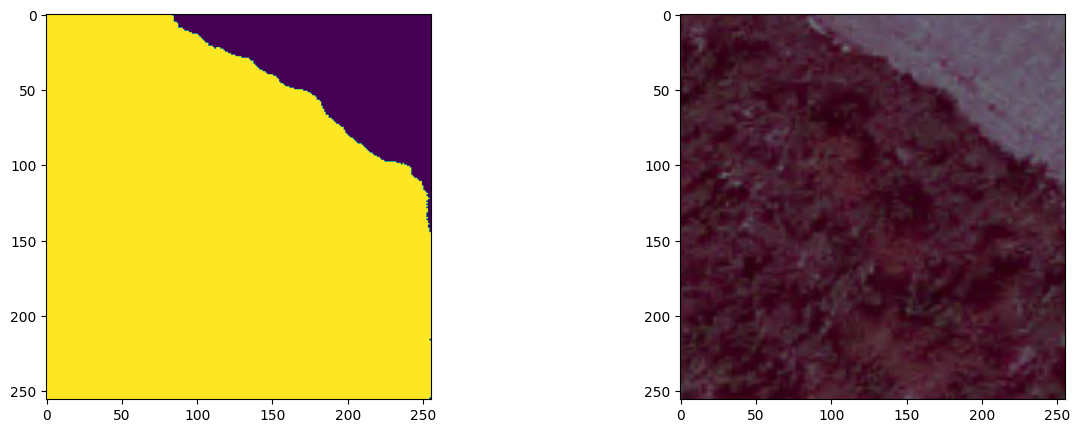

In [ ]:
tif_path = "/content/sidewalk_masks/1016_13_20_mask.tif"
ind = 39
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

# Testing Sam Vit-L

We also tested the slightly smaller L model in the hopes of improved performance, but again, even tweaking the thresholds led to disappointing performance as seen below

In [ ]:
dir = "/content/drive/MyDrive/Colab Notebooks/gdrive_test"
sidewalk_images = []

if os.path.exists(dir):
    # Get a list of all files in the directory
    files = os.listdir(dir)

    # Create a list of full paths to each file
    for file in files:
        full_path = os.path.join(dir, file)
        sidewalk_images.append(full_path)
sidewalk_images.sort()

In [ ]:
text_prompt = "tree"
model_path = "/content/drive/MyDrive/Colab Notebooks/model_checkpoint_trained_on_train.pth"

In [ ]:
sam = LangSAM(model_type="vit_l")

final text_encoder_type: bert-base-uncased


Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_l_0b3195.pth
100%|██████████| 1.16G/1.16G [00:08<00:00, 144MB/s]


In [ ]:
sam.predict_batch(
    images=sidewalk_images[20:40],
    out_dir="sidewalk_masks_sam_l",
    text_prompt=text_prompt,
    box_threshold=0.40,
    text_threshold=0.40,
    mask_multiplier=255,
    dtype="uint8",
    merge=False,
    verbose=True,
)

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_11_14.tif


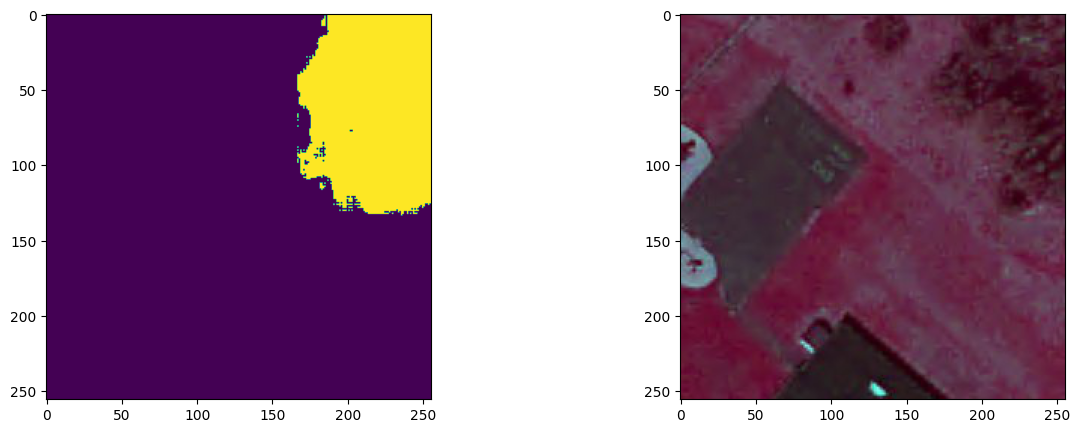

In [ ]:
tif_path = "/content/sidewalk_masks_sam_l/1016_11_14_mask.tif"
ind = 14
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_14.tif


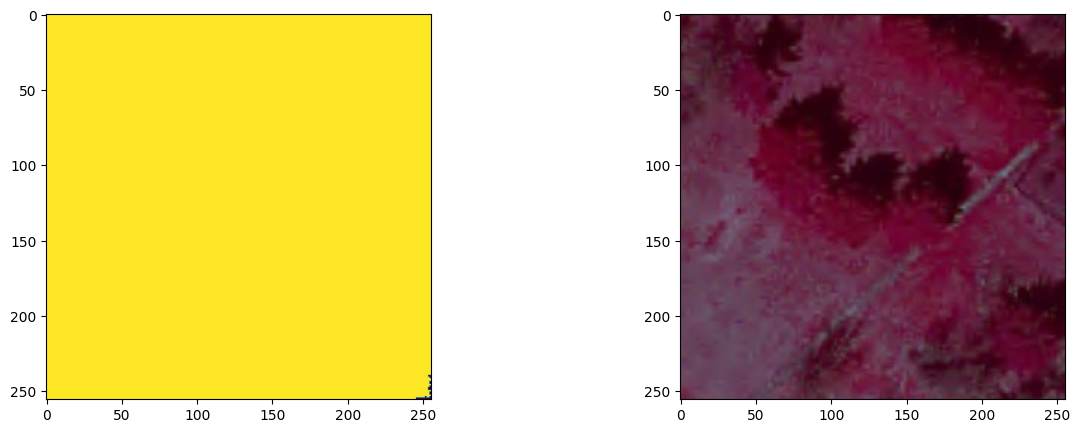

In [ ]:
tif_path = "/content/sidewalk_masks_sam_l/1016_10_14_mask.tif"
ind = 4
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_13_20.tif


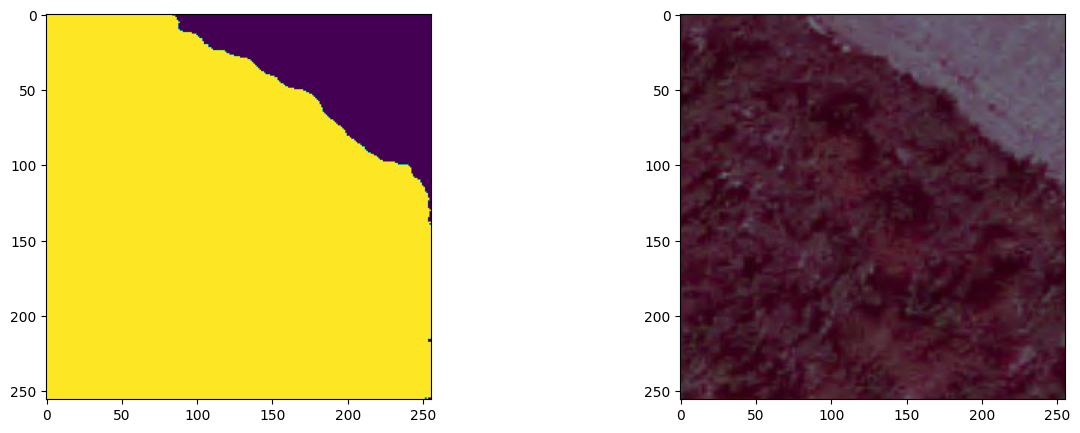

In [ ]:
tif_path = "/content/sidewalk_masks_sam_l/1016_13_20_mask.tif"
ind = 39
image_path = sidewalk_images[ind]

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

# Different Prompts

We also tried different prompts, including "red trees", "bushes", "grass", all of which yielded promises similar to "tree over sidewalk" below

In [ ]:
text_prompt = "tree over sidewalk"
sam.predict_batch(
    images=sidewalk_images[:20],
    out_dir="sidewalk_masks_sam_l_" + text_prompt,
    text_prompt=text_prompt,
    box_threshold=0.40,
    text_threshold=0.40,
    mask_multiplier=255,
    dtype="uint8",
    merge=False,
    verbose=True,
)

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_11_14.tif


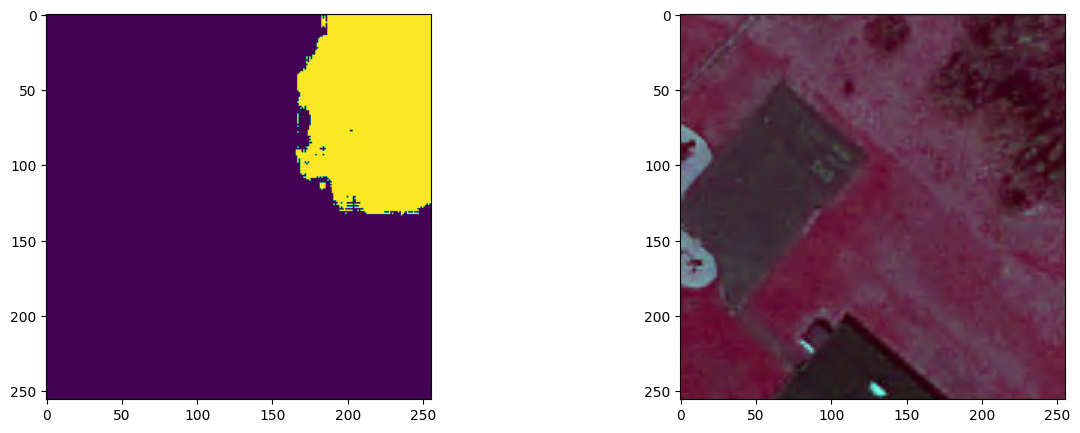

In [ ]:
tif_path = "/content/sidewalk_masks_sam_lbush/1016_11_14_mask.tif"
ind = 14
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()

Image Path:  /content/drive/MyDrive/Colab Notebooks/gdrive_test/1016_10_16.tif


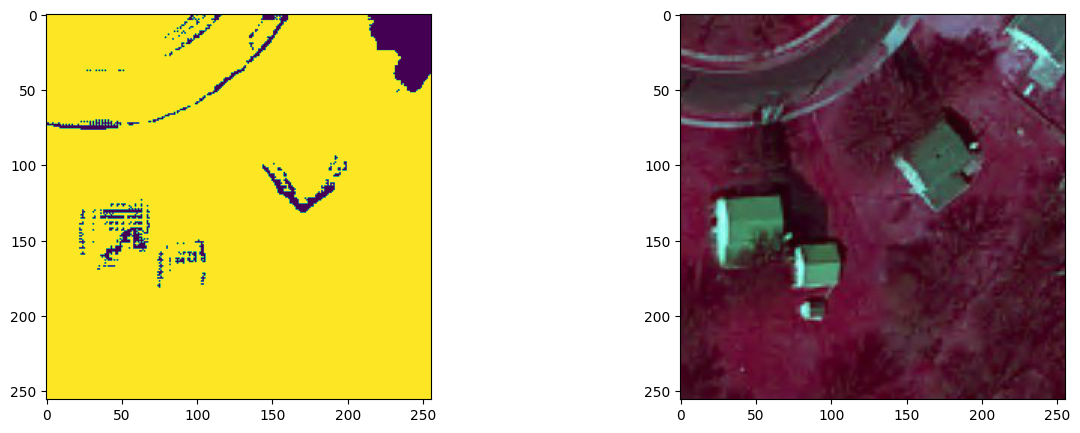

In [ ]:
tif_path = "/content/sidewalk_masks_sam_l_tree_over_sidewalk/1016_10_16_mask.tif"
ind = 5
image_path = sidewalk_images[ind]
#for i, image in enumerate(sidewalk_images[10:20]):
#  print(i, ": ", image)

mask_image = Image.open(tif_path)
original_image = Image.open(image_path)
print("Image Path: ", sidewalk_images[ind])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(mask_image)
axes[1].imshow(original_image)
plt.show()